In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Obtención de datos : 
# Nota : el flujo de datos de jupyter debe ser cambiado desde 1000000 kb/s a 1000000000 kB/s para la correcta ejecución de código

Se muestra un ejemplo de como funciona el algoritmo de obtención de datos 

In [ ]:


# Directorio que contiene los archivos
directorio = "C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\1O_20"

# Lista para almacenar los datos de todos los archivos
data_list_time = []

# Itera sobre los archivos en el directorio
for filename in os.listdir(directorio):
    if filename.endswith(".dat"):
        data_set_0 = []
        with open(os.path.join(directorio, filename), "r") as file:
            lines = file.readlines()
            for line in lines:
                # Elimina espacios en blanco y divide los valores en la línea
                values = line.strip().split()
                if len(values) == 1 and values[0] != "#Period":  # Primer conjunto de datos
                    data_set_0.append(values)     

    if filename.endswith(".time"):  # Asegúrate de que sean archivos TIME
        
        data_set_1 = []
        data_set_2 = []
        with open(os.path.join(directorio, filename), "r") as file:
            lines = file.readlines()
            for line in lines:
                # Elimina espacios en blanco y divide los valores en la línea
                values = line.strip().split()
                if len(values) == 5:  # Primer conjunto de datos
                    data_set_1.append(values+data_set_0[0])
                    #data_set_1.append(data_set_0[0])
                elif len(values) == 10:  # Primer conjunto de datos
                    data_set_2.extend(values[1:])
        id = data_set_2[0]

        df = pd.DataFrame(data_set_1, columns=["date", "MagR", "ErMagR", "MagB", "ErMagB","Period"])

        df.insert(0, 'ID', id)

        # Utiliza la función melt para duplicar las filas
        df = df.melt(id_vars=["ID", "date","ErMagR","ErMagB","Period"], var_name="band", value_name="value")
        # Filtra las filas donde "band" es "MagR" o "MagB"
        df = df[df["band"].str.startswith("Mag")]

        df['Er'] = np.where(df['band'] == 'MagR', df['ErMagR'], df['ErMagB'])

        columnas_a_eliminar = ["ErMagR", "ErMagB"]
        df = df.drop(columnas_a_eliminar, axis=1)

        # Restablece el índice si es necesario
        df.reset_index(drop=True, inplace=True)

        df.rename(columns={"ID": "oid",'date': 'time', 'band': 'band', "value": "magnitude", "Er": "error"}, inplace=True)

        df['band'] = df['band'].apply(lambda x: "r" if x == "MagR" else "u")

        bands = df['band'].unique()

        df['time'] = df['time'].astype(float)
        df['magnitude'] = df['magnitude'].astype(float)
        df['band'] = df['band'].astype(str)
        df['error'] = df['error'].astype(float)
        
        band_column = df.pop('band')
        df['band'] = band_column

        print(df)
        data_list_time.append(df.values.tolist())
    
        

print(data_list_time)

Se crea la función con la que se obtendran los datos 

In [3]:
def process_files_in_directory(directory, subclase, clase):
    data_list_time = []

    for filename in os.listdir(directory):
        if filename.endswith(".dat"):
            data_set_0 = []
            with open(os.path.join(directory, filename), "r") as file:
                lines = file.readlines()
                for line in lines:
                    # Elimina espacios en blanco y divide los valores en la línea
                    values = line.strip().split()
                    if len(values) == 1 and values[0] != "#Period":  # Primer conjunto de datos
                        data_set_0.append(values)   
                    
        if filename.endswith(".time"):  # Asegúrate de que sean archivos TIME
            data_set_1 = []
            data_set_2 = []

            with open(os.path.join(directory, filename), "r") as file:
                lines = file.readlines()
                for line in lines:
                    # Elimina espacios en blanco y divide los valores en la línea
                    values = line.strip().split()
                    if len(values) == 5:  # Primer conjunto de datos
                        data_set_1.append(values+data_set_0[0])
                    elif len(values) == 10:  # Segundo conjunto de datos
                        data_set_2.extend(values[1:])
            id = data_set_2[0]

            df = pd.DataFrame(data_set_1, columns=["date", "MagR", "ErMagR", "MagB", "ErMagB","Period"])
            df.insert(0, 'ID', id)

            # Utiliza la función melt para duplicar las filas
            df = df.melt(id_vars=["ID", "date", "ErMagR", "ErMagB","Period"], var_name="band", value_name="value")

            # Filtra las filas donde "band" es "MagR" o "MagB"
            df = df[df["band"].str.startswith("Mag")]

            df['Er'] = np.where(df['band'] == 'MagR', df['ErMagR'], df['ErMagB'])

            columnas_a_eliminar = ["ErMagR", "ErMagB"]
            df = df.drop(columnas_a_eliminar, axis=1)

            # Restablece el índice si es necesario
            df.reset_index(drop=True, inplace=True)

            df.rename(columns={"ID": "oid", 'date': 'time', 'band': 'band', "value": "magnitude", "Er": "error"}, inplace=True)

            df['band'] = df['band'].apply(lambda x: "r" if x == "MagR" else "u")

            bands = df['band'].unique()

            df['time'] = df['time'].astype(float)
            df['magnitude'] = df['magnitude'].astype(float)
            df['band'] = df['band'].astype(str)
            df['error'] = df['error'].astype(float)

            
            
            band_column = df.pop('band')
            df['band'] = band_column
            
            df['class'] = clase
            df['subclass'] = subclase

            data_list_time.append(df)
    df = pd.concat(data_list_time, ignore_index=True)
    df = df.set_index('oid')

    return df


Se ejecuta el codigo para crear la Data con todos los datos, demora 15 mins, se puede saltar este paso

In [13]:
#EJEMPLO

IO_20 = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\1O_20", "1O_2O","CEPH")
print(IO_20)
IO_30 = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\1O_3O", "1O_3O","CEPH")
dataframes = [IO_30, IO_20]

Data = pd.concat(dataframes, ignore_index=False)

Data.replace({99.999: np.nan, 9.999: np.nan}, inplace=True)

# Eliminar filas con valores NaN en cualquier columna
Data.dropna(inplace=True)
Data


                    time    Period  magnitude  error band class subclass
oid                                                                     
lm0010k7013    294.91026  0.605236     15.850  0.024    r  CEPH    1O_2O
lm0010k7013    296.91696  0.605236     15.807  0.034    r  CEPH    1O_2O
lm0010k7013    301.92747  0.605236     15.888  0.035    r  CEPH    1O_2O
lm0010k7013    315.89025  0.605236     15.893  0.034    r  CEPH    1O_2O
lm0010k7013    317.82385  0.605236     15.799  0.034    r  CEPH    1O_2O
...                  ...       ...        ...    ...  ...   ...      ...
lm0755l16521  2685.64723  0.906257     17.092  0.011    u  CEPH    1O_2O
lm0755l16521  2693.65211  0.906257     17.102  0.010    u  CEPH    1O_2O
lm0755l16521  2696.65064  0.906257     17.048  0.011    u  CEPH    1O_2O
lm0755l16521  2696.70354  0.906257     16.931  0.012    u  CEPH    1O_2O
lm0755l16521  2699.66958  0.906257     16.762  0.011    u  CEPH    1O_2O

[184332 rows x 7 columns]


,time,Period,magnitude,error,band,class,subclass
oid,,,,,,,
lm0184n13033,315.91920,0.571117,17.121,0.043,r,CEPH,1O_3O
lm0184n13033,316.91070,0.571117,17.313,0.023,r,CEPH,1O_3O
lm0184n13033,327.83750,0.571117,17.197,0.026,r,CEPH,1O_3O
lm0184n13033,334.90899,0.571117,17.280,0.026,r,CEPH,1O_3O
lm0184n13033,351.80454,0.571117,17.226,0.033,r,CEPH,1O_3O
...,...,...,...,...,...,...,...
lm0755l16521,2685.64723,0.906257,17.092,0.011,u,CEPH,1O_2O
lm0755l16521,2693.65211,0.906257,17.102,0.010,u,CEPH,1O_2O
lm0755l16521,2696.65064,0.906257,17.048,0.011,u,CEPH,1O_2O


Ahora graficaremos una estrella al azar con su error y magnitud de banda en función del tiempo 

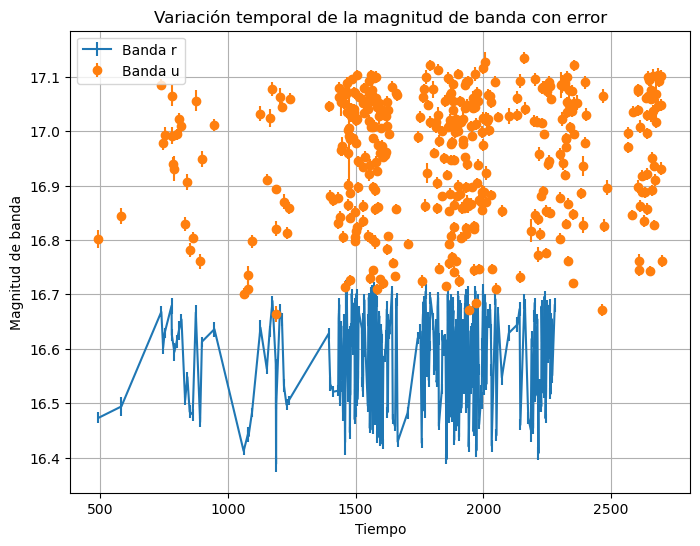

In [18]:
import matplotlib.pyplot as plt

# Suponiendo que 'Data' es tu DataFrame con las columnas apropiadas: 'time', 'magnitude', 'error', 'band'

# Filtrar datos para una estrella específica (por ejemplo, lm0755l16521)
star_id = 'lm0755l16521'
star_data = Data[Data.index == star_id]

# Filtrar por bandas 'r' y 'u'
star_data_r = star_data[star_data['band'] == 'r']
star_data_u = star_data[star_data['band'] == 'u']

# Graficar para la banda 'r'
plt.figure(figsize=(8, 6))
plt.errorbar(star_data_r['time'], star_data_r['magnitude'], yerr=star_data_r['error'], fmt='-', label='Banda r')

# Graficar para la banda 'u'
plt.errorbar(star_data_u['time'], star_data_u['magnitude'], yerr=star_data_u['error'], fmt='o', label='Banda u')

plt.xlabel('Tiempo')
plt.ylabel('Magnitud de banda')
plt.title('Variación temporal de la magnitud de banda con error')

plt.legend()
plt.grid(True)
plt.show()

Ejecutaremos la anterior función para cada carpeta, agregando la clase y sublcase correspondiente 

In [19]:
#RRL

RRab = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\RRL\\RRab", "RRab","RRL")
RRc  = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\RRL\\RRc", "RRc","RRL")
RRd  = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\RRL\\RRd", "RRd","RRL")
RRe  = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\RRL\\RRe", "RRe","RRL")


# CEPH
IO = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\1O", "1O","CEPH")
IO_30 = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\1O_3O", "1O_3O","CEPH")
IO_20 = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\1O_20", "1O_2O","CEPH")
IO_20_3O = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\1O_20_3O", "1O_20_3O","CEPH")
IIO = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\2O", "2O","CEPH")
F = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\F", "F","CEPH")
F_10 = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\F_10", "F_10","CEPH")
F_10_20 = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\F_10_20", "F_10_20","CEPH")

#EB

EC = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\EC", "EC","EB")
ED = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ED", "ED","EB")
ED_ESD = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ED_ESD", "ED_ESD","EB")
ED_TEB= process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ED_TEB", "ED_TEB","EB")
ED_VAR = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ED_VAR", "ED_VAR","EB")
ELL_EC = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ELL_EC", "ELL_EC","EB")
ESD = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ESD", "ESD","EB")
ESD_DPV = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ESD_DPV", "ESD_DPV","EB")



dataframes = [IO, IO_30, IO_20, IO_20_3O, IIO, F, F_10, F_10_20, EC, ED, ED_ESD, ED_TEB, ED_VAR, ELL_EC, ESD, ESD_DPV, RRab, RRc, RRd, RRe]

# Concatena los DataFrames en un gran DataFrame
Data_Final = pd.concat(dataframes, ignore_index=False)

print(Data_Final)

                    time    Period  magnitude  error band class subclass
oid                                                                     
lm0010k11782   294.91026  0.819635     16.700  0.032    r  CEPH       1O
lm0010k11782   296.91696  0.819635     16.824  0.045    r  CEPH       1O
lm0010k11782   301.92747  0.819635     16.854  0.045    r  CEPH       1O
lm0010k11782   315.89025  0.819635     16.882  0.043    r  CEPH       1O
lm0010k11782   317.82385  0.819635     16.723  0.043    r  CEPH       1O
...                  ...       ...        ...    ...  ...   ...      ...
lm0750n15497  2682.64361  0.387339     20.144  0.163    u   RRL      RRe
lm0750n15497  2682.77791  0.387339     20.506  0.222    u   RRL      RRe
lm0750n15497  2693.65211  0.387339     20.695  0.161    u   RRL      RRe
lm0750n15497  2696.65064  0.387339     20.916  0.243    u   RRL      RRe
lm0750n15497  2696.70354  0.387339     20.881  0.413    u   RRL      RRe

[31904050 rows x 7 columns]


In [20]:
Data_Final.replace({99.999: np.nan, 9.999: np.nan}, inplace=True)

# Eliminar filas con valores NaN en cualquier columna
Data_Final.dropna(inplace=True)
Data_Final


,time,Period,magnitude,error,band,class,subclass
oid,,,,,,,
lm0010k11782,294.91026,0.819635,16.700,0.032,r,CEPH,1O
lm0010k11782,296.91696,0.819635,16.824,0.045,r,CEPH,1O
lm0010k11782,301.92747,0.819635,16.854,0.045,r,CEPH,1O
lm0010k11782,315.89025,0.819635,16.882,0.043,r,CEPH,1O
lm0010k11782,317.82385,0.819635,16.723,0.043,r,CEPH,1O
...,...,...,...,...,...,...,...
lm0750n15497,2682.64361,0.387339,20.144,0.163,u,RRL,RRe
lm0750n15497,2682.77791,0.387339,20.506,0.222,u,RRL,RRe
lm0750n15497,2693.65211,0.387339,20.695,0.161,u,RRL,RRe


In [22]:
Data_Final.to_csv('Data_Final.csv', index=True)